
## <b> Corrige Examen  ANALYSE EXPLORATOIRE DES DONNÉES</b>

### 2. Importer les bibliothèques nécessaires
Importez les bibliothèques nécessaires pour le projet :
- Pandas : pour la manipulation des données.
- Matplotlib : pour créer des graphiques.

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

### 3. Charger et explorer le dataset

a. Informations générales sur le dataset : Chargez les données à partir du fichier CSV,  affichez les 10 lignes et examinez les types de données.

In [45]:
df = pd.read_csv('/content/student_mat1.csv')
df.sample(10)

,school,sex,age,address,Mjob,Fjob,studytime,absences,G1,G2,G3
127,GP,F,19.0,U,at_home,other,2.0,2,7,8,9
224,GP,F,16.0,U,teacher,services,3.0,0,13,13,14
364,MS,F,17.0,R,other,services,2.0,0,12,11,12
394,MS,M,19.0,U,other,at_home,1.0,5,8,9,9
57,GP,M,15.0,U,teacher,health,NaN,4,14,15,15
99,GP,F,16.0,U,other,at_home,3.0,0,7,9,8
178,GP,M,16.0,R,teacher,services,1.0,10,10,8,9
5,GP,M,16.0,U,services,other,2.0,10,15,15,15
97,GP,F,16.0,U,other,other,2.0,2,8,9,10
245,GP,M,16.0,U,other,other,1.0,6,18,18,18


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   school     363 non-null    object 
 1   sex        395 non-null    object 
 2   age        378 non-null    float64
 3   address    395 non-null    object 
 4   Mjob       395 non-null    object 
 5   Fjob       395 non-null    object 
 6   studytime  330 non-null    float64
 7   absences   395 non-null    int64  
 8   G1         395 non-null    int64  
 9   G2         395 non-null    int64  
 10  G3         395 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 34.1+ KB


b. Statistiques descriptives : Obtenez des statistiques descriptives pour les colonnes numériques  (moyenne, écart-type, valeurs minimales, maximales, etc.), ensuite sur les colonnes catégorielles

In [47]:
# Variable numerique
df.describe()

,age,studytime,absences,G1,G2,G3
count,378.000000,330.000000,395.000000,395.000000,395.000000,395.000000
mean,16.735450,2.087879,6.205063,10.908861,10.713924,10.415190
std,1.410029,0.952443,10.171173,3.319195,3.761505,4.581443
min,15.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,1.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,2.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,2.000000,8.000000,13.000000,13.000000,14.000000
max,24.000000,7.000000,79.000000,19.000000,19.000000,20.000000


In [48]:
# Variable categorielles
df.describe(include = ['O'])

,school,sex,address,Mjob,Fjob
count,363,395,395,395,395
unique,2,2,2,5,5
top,GP,F,U,other,other
freq,322,208,307,141,217


c. Grouper par une catégorie : Groupez les données par la colonne school (établissement scolaire de l'élève) et calculez des statistiques pour chaque groupe, telles que la moyenne des notes G3 et du nombre d'absences.

In [49]:
group_stats = df.groupby('school').agg({'G3': 'mean', 'absences': 'sum'})
group_stats

,G3,absences
school,,
GP,10.493789,2077
MS,9.658537,154


d. Trier les groupes : Triez les groupes selon la variable age pour mieux comparer les statistiques des variables G1, G2, et G3 entre les groupes.

In [50]:
group_stats = df.groupby('age')[['G1', 'G2', 'G3']].agg(['mean', 'std', 'min', 'max', 'count'])
group_stats

G1                                 G2                          \
           mean       std min max count       mean       std min max count   
age                                                                          
15.0  11.102564  3.293400   5  18    78  11.256410  4.122904   0  19    78   
16.0  11.019802  3.249554   4  19   101  11.287129  3.694148   0  19   101   
17.0  10.904255  3.199695   5  18    94  10.457447  3.478551   0  18    94   
18.0  10.743243  3.557977   5  19    74  10.094595  3.889462   0  18    74   
19.0  10.250000  3.151949   5  15    24   9.250000  3.096281   0  14    24   
20.0  16.000000  1.414214  15  17     2  16.000000  2.828427  14  18     2   
21.0  10.000000       NaN  10  10     1   8.000000       NaN   8   8     1   
22.0   6.000000       NaN   6   6     1   8.000000       NaN   8   8     1   
23.0  14.000000       NaN  14  14     1  12.000000       NaN  12  12     1   
24.0   5.500000  3.535534   3   8     2   6.500000  2.121320   5   8     2   

             G3                          
           mean       std min max count  
age                                      
15.0  11.128205  4.604794   0  19    78  
16.0  11.118812  4.304154   0  20   101  
17.0  10.212766  4.312703   0  18    94  
18.0   9.702703  4.931669   0  19    74  
19.0   8.208333  4.606037   0  13    24  
20.0  16.500000  2.121320  15  18     2  
21.0   7.000000       NaN   7   7     1  
22.0   8.000000       NaN   8   8     1  
23.0  12.000000       NaN  12  12     1  
24.0   7.500000  3.535534   5  10     2

### 4. Prétraiter les données

a.	Vérification des valeurs manquantes : Vérifiez les valeurs manquantes et traitez-les en les remplissant par la moyenne, le mode ou en les supprimant si nécessaire.

In [51]:
print(df.isnull().sum())

school       32
sex           0
age          17
address       0
Mjob          0
Fjob          0
studytime    65
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [52]:
imputer = SimpleImputer(strategy="most_frequent")
df[["school"]] = imputer.fit_transform(df[["school"]])
df[["studytime"]] = imputer.fit_transform(df[["studytime"]])

In [53]:
imputer = SimpleImputer(strategy="median")
df[['age']] = imputer.fit_transform(df[['age']])

In [54]:
print(df.isnull().sum())

school       0
sex          0
age          0
address      0
Mjob         0
Fjob         0
studytime    0
absences     0
G1           0
G2           0
G3           0
dtype: int64


In [55]:
df.sample(10)

,school,sex,age,address,Mjob,Fjob,studytime,absences,G1,G2,G3
199,GP,F,16.0,U,teacher,teacher,2.0,0,9,9,10
252,GP,M,18.0,U,services,services,1.0,4,6,9,8
299,GP,M,18.0,U,teacher,teacher,1.0,5,16,15,16
110,GP,M,15.0,U,teacher,teacher,1.0,6,18,19,19
169,GP,F,16.0,U,health,health,2.0,0,14,14,14
307,GP,M,19.0,U,teacher,services,2.0,38,8,9,8
328,GP,F,17.0,U,teacher,services,3.0,7,10,9,9
324,GP,F,17.0,U,at_home,at_home,2.0,0,16,15,15
27,GP,M,15.0,U,health,services,1.0,4,15,16,15
190,GP,F,16.0,U,services,services,2.0,10,11,12,13


b.	Vérification des valeurs aberrantes : Identifiez les valeurs aberrantes dans les colonnes numériques, Traitez ces valeurs en les remplaçant par la moyenne, la médiane, ou en les supprimant selon le cas.

In [56]:
import pandas as pd

def find_outliers_IQR(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

def manage_extreme_values(df, show_replace='show'):
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            lower_bound, upper_bound = find_outliers_IQR(df[column])
            outliers_mask = (df[column] < lower_bound) | (df[column] > upper_bound)
            num_outliers_before = outliers_mask.sum()

            print(f"\nColonne '{column}':")
            print(f"  ➤ Nombre de valeurs aberrantes AVANT traitement : {num_outliers_before}")

            if show_replace == 'show':
                outliers = df[outliers_mask]
                print(outliers)

            elif show_replace == 'replace':
                mode_value = df[column].mode()[0]  # Mode de la colonne
                df[column] = df[column].apply(lambda x: mode_value if (x < lower_bound or x > upper_bound) else x)

                # Recalcul après remplacement
                new_lower, new_upper = find_outliers_IQR(df[column])
                new_outliers_mask = (df[column] < new_lower) | (df[column] > new_upper)
                num_outliers_after = new_outliers_mask.sum()

                print(f"  ➤ Nombre de valeurs aberrantes APRÈS traitement : {num_outliers_after}")

    if show_replace == 'replace':
        return df


In [57]:
df = manage_extreme_values(df, show_replace='replace')


Colonne 'age':
  ➤ Nombre de valeurs aberrantes AVANT traitement : 4
  ➤ Nombre de valeurs aberrantes APRÈS traitement : 0

Colonne 'studytime':
  ➤ Nombre de valeurs aberrantes AVANT traitement : 166
  ➤ Nombre de valeurs aberrantes APRÈS traitement : 0

Colonne 'absences':
  ➤ Nombre de valeurs aberrantes AVANT traitement : 17
  ➤ Nombre de valeurs aberrantes APRÈS traitement : 11

Colonne 'G1':
  ➤ Nombre de valeurs aberrantes AVANT traitement : 0
  ➤ Nombre de valeurs aberrantes APRÈS traitement : 0

Colonne 'G2':
  ➤ Nombre de valeurs aberrantes AVANT traitement : 13
  ➤ Nombre de valeurs aberrantes APRÈS traitement : 0

Colonne 'G3':
  ➤ Nombre de valeurs aberrantes AVANT traitement : 0
  ➤ Nombre de valeurs aberrantes APRÈS traitement : 0


c.	Encodage des variables catégorielles : Pour les variables catégorielles telles que school, sex, Mjob, et Fjob, appliquez un encodage approprié (par exemple, encodage One-Hot ou Label Encoding).

In [58]:
df.head(10)

,school,sex,age,address,Mjob,Fjob,studytime,absences,G1,G2,G3
0,GP,F,18.0,U,at_home,teacher,2.0,6,5,6,6
1,GP,F,17.0,U,at_home,other,2.0,4,5,5,6
2,GP,F,15.0,U,at_home,other,2.0,10,7,8,10
3,GP,F,15.0,U,health,services,2.0,2,15,14,15
4,GP,F,16.0,U,other,other,2.0,4,6,10,10
5,GP,M,16.0,U,services,other,2.0,10,15,15,15
6,GP,M,16.0,U,other,other,2.0,0,12,12,11
7,GP,F,17.0,U,other,teacher,2.0,6,6,5,6
8,GP,M,15.0,U,services,other,2.0,0,16,18,19
9,GP,M,17.0,U,other,other,2.0,0,14,15,15


In [59]:
#Categorical variables: school, sex, address, Mjob, Fjob

# category columns with binary values: school, sex, address. (we will use LabelEncoder)
label_encoder = LabelEncoder()
df['school'] = label_encoder.fit_transform(df['school'])
df['address'] = label_encoder.fit_transform(df['address'])

# category columns with multiple values: Mjob, Fjob (we will use One-Hot Encoding)
one_hot_encoder = OneHotEncoder(sparse_output=False)
encoded_data = one_hot_encoder.fit_transform(df[['Mjob', 'Fjob','sex']])

encoded_df = pd.DataFrame(encoded_data, columns=one_hot_encoder.get_feature_names_out(['Mjob', 'Fjob','sex']))

df = df.drop(columns=['Mjob', 'Fjob','sex'])
df = pd.concat([df, encoded_df], axis=1)

In [60]:
df.head(10)

,school,age,address,studytime,absences,G1,G2,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,sex_F,sex_M
0,0,18.0,1,2.0,6,5,6,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0,17.0,1,2.0,4,5,5,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0,15.0,1,2.0,10,7,8,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0,15.0,1,2.0,2,15,14,15,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0,16.0,1,2.0,4,6,10,10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,0,16.0,1,2.0,10,15,15,15,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,0,16.0,1,2.0,0,12,12,11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7,0,17.0,1,2.0,6,6,5,6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
8,0,15.0,1,2.0,0,16,18,19,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9,0,17.0,1,2.0,0,14,15,15,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### 5. Créer des graphiques avec Matplotlib

a. Histogramme : Réalisez un histogramme pour visualiser la distribution de l'âge des élèves.

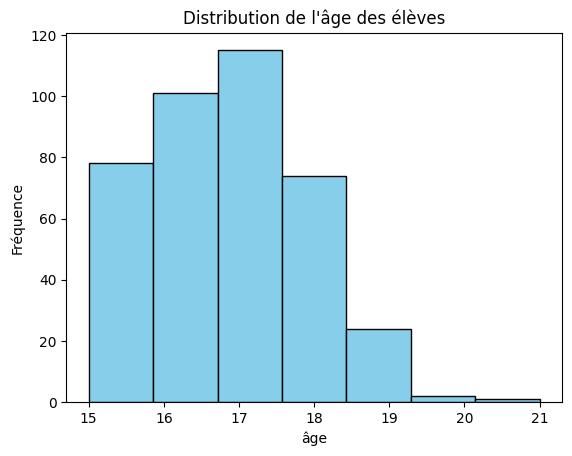

In [61]:
plt.hist(df['age'], bins=7, color='skyblue', edgecolor='black')
plt.title("Distribution de l'âge des élèves")
plt.xlabel('âge')
plt.ylabel('Fréquence')
plt.show()

b. Diagramme à barres : Créez un diagramme à barres pour représenter le nombre d'élèves en fonction de leur sexe (sex).

Text(0.5, 1.0, "Nombre d'élèves en fonction de leur sexe")

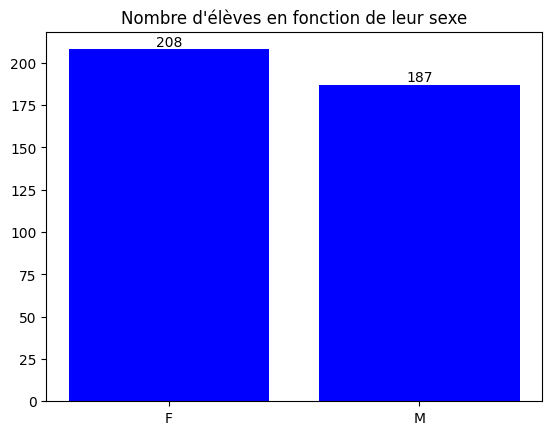

In [62]:
categories = df[['sex_F', 'sex_M']].idxmax(axis=1).value_counts().index
values = df[['sex_F', 'sex_M']].idxmax(axis=1).value_counts().values

# Map the encoded column names to 'F' and 'M'
categories = categories.map({'sex_F': 'F', 'sex_M': 'M'})

bars = plt.bar(categories, values, color='blue')
plt.bar_label(bars)

plt.title("Nombre d'élèves en fonction de leur sexe")

c. Diagramme circulaire (Pie Chart) : Construisez un diagramme circulaire pour montrer la répartition des élèves selon leur lieu de résidence (address).

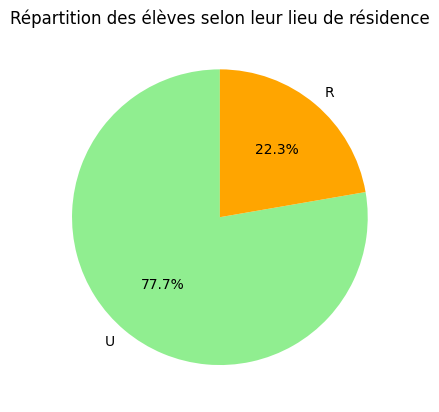

In [63]:
sizes = df['address'].value_counts()

plt.title("Répartition des élèves selon leur lieu de résidence")
colors = ['lightgreen', 'orange']
plt.pie(sizes, labels=sizes.index.map({0: 'R', 1: 'U'}), colors=colors, autopct='%1.1f%%', startangle=90)
plt.show()

d. Diagramme à moustaches (Boxplot) : Tracez un boxplot pour observer la distribution des notes finales (G3).

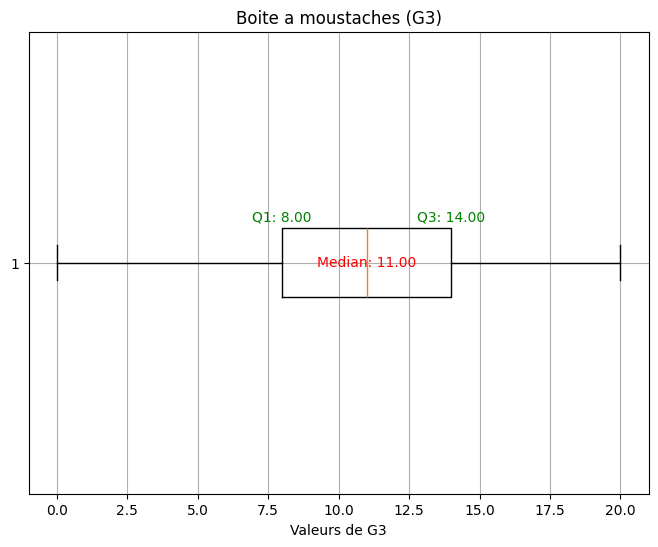

In [64]:
# Diagramme à moustaches (Boxplot)
plt.figure(figsize=(8, 6))

median = np.median(df['G3'])
q1 = np.percentile(df['G3'], 25)
q3 = np.percentile(df['G3'], 75)

plt.text(median, 1, f'Median: {median:.2f}', horizontalalignment='center', verticalalignment='center', color='red')
plt.text(q1, 1.1, f'Q1: {q1:.2f}', horizontalalignment='center', verticalalignment='center', color='green')
plt.text(q3, 1.1, f'Q3: {q3:.2f}', horizontalalignment='center', verticalalignment='center', color='green')

plt.boxplot(df['G3'], vert=False)
plt.title('Boite a moustaches (G3)')
plt.xlabel('Valeurs de G3')
plt.grid(True)

### 6. Graphique en nuage de points (Scatter Plot)

Réalisez un nuage de points pour visualiser la relation entre l'âge des élèves (age) et leurs notes finales (G3).

Text(0, 0.5, 'G3')

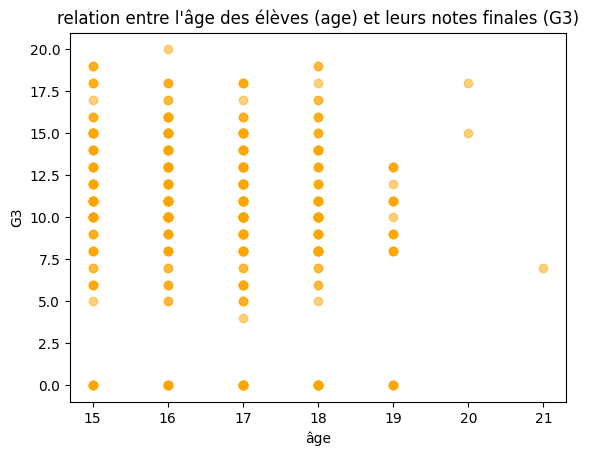

In [65]:
plt.scatter(df['age'], df['G3'], color='orange', alpha=0.5)

plt.title("relation entre l'âge des élèves (age) et leurs notes finales (G3)")
plt.xlabel('âge')
plt.ylabel('G3')

### 7. Graphique en lignes

Créez un graphique en lignes pour visualiser la tendance d'une variable, par exemple l'évolution des notes moyennes (G3) en fonction de l'âge (age).

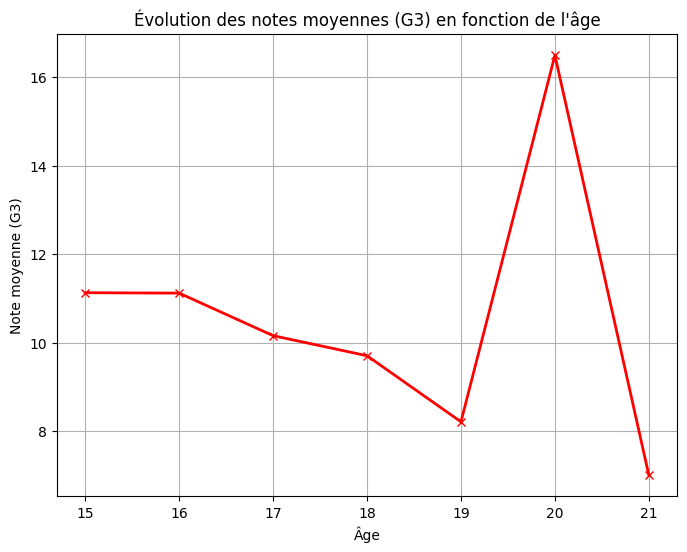

In [66]:
# Group by 'age' and calculate the mean of 'G3' for each age
age_group = df.groupby('age')['G3'].mean()

plt.figure(figsize=(8, 6))
plt.plot(age_group.index, age_group.values, marker='x', color='red', linestyle='-', linewidth=2)

plt.title("Évolution des notes moyennes (G3) en fonction de l'âge")
plt.xlabel("Âge")
plt.ylabel("Note moyenne (G3)")
plt.grid(True)